## Skoltech
## Intro to data science, fall 2020
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/1zwUO1KZNDTZYuD12dyMO3CaErGHnZuHx1Mdbo-c11ME/

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q5) do not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=29

#### Import basic libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Dataset
For the task we'll use kickstarter dataset. Kickstarter is the crowdfounding platform, where people can announce their project with financial goals and other can support the projects by paying the money ("pledging"). The goal will be to predict if the project will be successfull, i.e. would it achieve the funding goal. Let's take a brief look to the dataset.

In [ ]:
# FOR GOOGLE COLAB
# from google.colab import drive
# drive.mount('/content/gdrive')
# file_path = 'gdrive/My Drive/Data Science/ks-projects-201801.csv'
# df_file = pd.read_csv(file_path, delimiter=',')

In [ ]:
# FOR JUPITER NOTEBOOK
df_file = pd.read_csv('ks-projects-201801.csv')

In [ ]:
df_file.set_index("ID", inplace=True)

In [ ]:
#display 50 random lines
df_file.sample(50)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1362853434,The Fat Moose by Moose Bicycle,Product Design,Design,CAD,2015-01-01,25000.0,2014-12-02 21:12:03,44419.00,successful,65,CA,38849.70,38023.45,21400.45
1934133039,The Culinary Wall (Theatrically Narrated Cu...,Documentary,Film & Video,USD,2015-12-02,6500.0,2015-11-02 19:54:44,100.00,failed,1,US,100.00,100.00,6500.00
1364826790,The Carot,Publishing,Publishing,USD,2017-03-15,600.0,2017-03-08 02:04:39,643.00,successful,28,US,261.00,643.00,600.00
1044637218,Bare Metal IoT and Raspberry Pi,Software,Technology,USD,2014-12-11,10000.0,2014-11-21 16:31:22,340.00,failed,18,US,340.00,340.00,10000.00
565374491,Beto-App zur Koordination von Flüchtlingshilfe...,Apps,Technology,EUR,2016-02-29,5000.0,2015-12-31 13:02:34,5037.52,successful,83,DE,5505.86,5526.14,5484.98
1755838854,The Voice Of The People (Voice),Journalism,Journalism,CAD,2015-08-10,75000.0,2015-06-11 21:45:09,25.00,failed,1,CA,20.24,19.17,57497.70
2011822727,Send me (to South Korea),Ceramics,Art,EUR,2017-04-03,2500.0,2017-03-04 18:48:04,2700.00,successful,30,NL,73.64,2870.11,2657.51
752698695,Groovy Glove: Change the Way You Clean,Product Design,Design,USD,2016-12-18,15000.0,2016-11-17 03:04:43,2809.88,failed,78,US,642.00,2809.88,15000.00
1494050964,L'universe,Performance Art,Art,GBP,2014-02-03,125000.0,2013-12-20 10:40:18,0.00,failed,0,GB,0.00,0.00,204084.96


In [ ]:
df_file.shape

(378661, 14)

In [ ]:
df_file.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

# Section 1. Dataset acquaintance

-----

### Q1.1

#### How many NaN values are there in the dataset?

----

In [ ]:
print(df_file.isnull().sum().sum())
df_file = df_file.dropna()

3801


----

Let us simplify the task a little bit: we are aiming to predict either project fails or not.
Thus 'success' projects will be encoded as 1, with state ['failed', 'canceled'] as 0 and we remove the rows with any other state.

### Q1.2 
#### How many '1' values are in resulting dataset (in state column)?

In [ ]:
display(df_file[df_file.state == 'suspended']) # delete rows with state 'suspended'

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1001732009,DotPen : Redefines drawing and writing for sma...,Product Design,Design,USD,2014-08-09,25000.0,2014-06-30 21:17:10,39693.00,suspended,647,US,39693.00,39693.00,25000.00
1003367610,Aleppo - Make Soap Not War,Crafts,Crafts,DKK,2017-07-13,55000.0,2017-06-19 08:34:15,20320.00,suspended,60,DK,3059.73,3119.10,8442.45
1003378025,Hackchain - The World's First Wearable Wifi Ja...,Wearables,Technology,USD,2017-11-10,30000.0,2017-10-11 03:53:25,994.00,suspended,15,US,557.00,994.00,30000.00
100524873,PRESIDENT OF THE UNITED STATES (Suspended),Academic,Publishing,USD,2015-10-25,5500.0,2015-08-26 05:54:42,0.00,suspended,0,US,0.00,0.00,5500.00
1005618996,Masters of the Tooniverse Podcast (Suspended),Webseries,Film & Video,USD,2013-07-02,3200.0,2013-05-30 19:24:22,3226.00,suspended,24,US,3226.00,3226.00,3200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994137973,UsBidi - The World's Most Intelligent Charger ...,Gadgets,Technology,AUD,2015-12-04,35000.0,2015-10-20 15:33:54,501964.79,suspended,8180,AU,365230.79,367309.23,25611.01
994145334,Lego super hero cake (Suspended),Events,Food,USD,2015-09-28,100.0,2015-08-30 22:37:59,0.00,suspended,0,US,0.00,0.00,100.00
998830045,Transgender MTF. Transition and the release of...,Journalism,Journalism,CAD,2015-07-14,30000.0,2015-05-15 21:40:02,5.00,suspended,1,CA,4.18,3.85,23116.04


In [ ]:
df_file = df_file.drop(df_file.query("state != 'successful' and state !='failed' and state != 'canceled'").index)

df_file['state'] = (df_file['state'] == 'successful').astype(int)


-----

In [ ]:
display(int(df_file.query("state == '1'").state.value_counts()))

133851

------

### Q1.3
#### Whats is a name of a project attracted the biggest pay check? (on average). Use column usd_pledged_real to judge. If there are multiple projects, choose any single one.

-----

In [ ]:
q1_3 = df_file.query("backers != 0")
q1_3 = (q1_3['usd_pledged_real'] / q1_3['backers'])

a1_3 = q1_3.idxmax()
print(df_file.query("ID == @a1_3")['name'].item())

Patented (9 seasons) food enhancer


-----

### Q1.4
#### What is the most successful main category (in terms of success percentage)?

-----

In [ ]:
q1_4 = df_file.groupby('main_category')['state'].mean().sort_values(ascending = False)
print(q1_4.index[0])

Dance


-----

### Q1.5
#### Define the category with highest goal per project. How many projects belong to it?  (note: we use category here, not main_category)

-----

In [ ]:
q1_5 = (df_file.groupby('category')['goal'].mean().sort_values(ascending = False).index[0])
print(q1_5)
print(df_file[df_file['category'] == q1_5].shape[0])

Movie Theaters
227


-----

### Q1.6
#### What is the category with biggest total pledge? Use 'usd_pledged_real' to judge.

------

In [ ]:
df_stat = df_file.describe()
max1_6 = df_stat['usd_pledged_real']['max']
print(df_file.query("usd_pledged_real == @max1_6")['category'].item())

Product Design


------

As one can notice, there are both numerical and object-type data in our dataframe. 

We suggest you to split them to perform EDA separately. 

### Q1.7
#### Split columns to 'numeric' (by data type) and object-type. How many 'object-type' features are there?

In [ ]:
df_obj = df_file.select_dtypes(include= "O")
df_num = df_file.select_dtypes(exclude= "O")

print(len(df_obj.columns))

7


### Q1.8
#### Let's do a bit of feature engineering. Let's create column 'pledge2goal' which define as ratio of usd_pledged_real to goal. How many outliers are there?
#### (We use a simple rule: an object is an outlier if it does not belong to [q25 - 1.5iqr, q75 + 1.5 iqr] interval, where qxx -- xx quantile, and iqr is inter-quantile range.)

In [ ]:
df_file['pledge2goal'] = df_file['usd_pledged_real'] / df_file['goal']


Q1 = df_file['pledge2goal'].quantile(0.25)
Q3 = df_file['pledge2goal'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df_file['pledge2goal'] < (Q1 - 1.5 * IQR)) | (df_file['pledge2goal'] > (Q3 + 1.5 * IQR))
number_outliers = outliers.sum()

#drop outliers
df_file = df_file.drop(df_file[outliers == True].index)

print(number_outliers)

18415


### Q1.9
#### Visualize the feature for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the ratio matters.
- B. Distributions have almost no intersection, the bigger ratio, the bigger success.
- C. Distributions intersect significantly, the bigger ratio, the bigger success
- D. Distributions have almost no intersection, the less ratio, the bigger success.

-----

In [ ]:
df_slice = df_file.drop(df_file[outliers == True].index)

<ipython-input-18-a22ca829c9a2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_slice = df_file.drop(df_file[outliers == True].index)


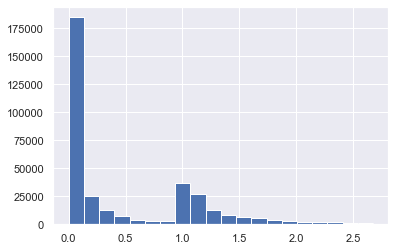

In [ ]:
bars, bins, _ = plt.hist(df_slice['pledge2goal'], bins = 20, histtype='barstacked')

In [ ]:
# from one hand B is coorect, from the other one - D. 
print("B and D are correct")

B and D are correct


-----

### Q1.10
#### Continue with plot from Q1.9. Where are the peaks located? We expect two numbers here as the answer

-----

In [ ]:
max1 = bars.argmax()
bars[max1] = 0
max2 = bars.argmax()

print(str(round(bins[max2],3))+','+str(bins[max1]))

0.936,0.0


-----

### Q1.11
#### Compute Pearson correlation coefficient between the pledge2real and target variable.

----

In [ ]:
print(round(df_file.corr(method='pearson').pledge2goal.state,3))

0.902


-----

### Q1.12
#### Visualize dependancy of numerical data with success. What can you say about it?

Text(0.5, 0, 'backers')

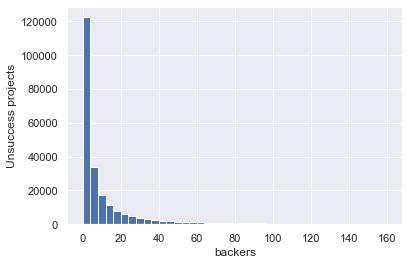

In [ ]:
plt.hist(df_file.backers[df_file.state==0], range=(0,160), bins = 40);
plt.ylabel('Unsuccess projects')
plt.xlabel('backers')

Text(0.5, 0, 'backers')

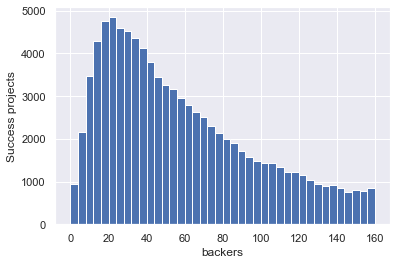

In [ ]:
plt.hist(df_file.backers[df_file.state==1], range=(0,160), bins = 40);
plt.ylabel('Success projects')
plt.xlabel('backers')

In [ ]:
''' a large number of backers does not guarantee the success of a project. '''

' a large number of backers does not guarantee the success of a project. '

# Feature generation
Lets' generate some more feature that could be useful

### Q2.1 Create a year column that would hold the year. How many projects were in year 2012?

In [ ]:
df_file['year'] = pd.to_datetime(df_file['launched']).dt.year
print(len(df_file.query("year == 2012").index))

39737


### Q2.2 Make a column 'duration_days' with number of full days from launch to deadline.
What is median value for this column?

In [ ]:
df_file['duration_days'] = (pd.to_datetime(df_file['deadline']) - pd.to_datetime(df_file['launched'])).dt.days
print(int(df_file.duration_days.median()))

29


### Q2.3 Delete mistaken value from column 'country'. What is the value?

In [ ]:
df_file['country'].unique()
q2_3 = 'N,0"'
df_file = df_file.drop(df_file.query("country == @q2_3").index)
print(q2_3)


N,0"


### Q2.4 Make column 'region' out of column country (america, europe, asia, oceania(including australiza/nz))
Where is the region with the worst conversion rate (percentage of successful projects)

In [ ]:
america_counties =  ['US','CA','MX']
europe_counties = ['GB','DE','FR','NL','IT','ES','SE','DK','IE','CH','NO','BE','AT','LU']
oceania_countries = ['AU','NZ']
asia_countries = ['HK','SG','JP']

df_file.loc[df_file['country'].isin(america_counties), 'region'] = 'america'
df_file.loc[df_file['country'].isin(europe_counties), 'region'] = 'europe'
df_file.loc[df_file['country'].isin(oceania_countries), 'region'] = 'oceania'
df_file.loc[df_file['country'].isin(asia_countries), 'region'] = 'asia'

print(df_file.groupby('region')['state'].mean().sort_values().index[0])

#https://stackoverflow.com/questions/45803676/python-pandas-loc-filter-for-list-of-values

oceania


### Q2.5 For each main_category leave only the three most popular category and replace other with "other"
What is the most frequent subcategory for design?

In [ ]:
gp = df_file.groupby('main_category')['category'].value_counts().reset_index(name='Count')
gp2 = gp.groupby('main_category')[['category', 'Count']].apply(pd.DataFrame.nlargest, n = 3 , columns=['Count'])
q2_5 = gp2['category'].tolist()

df_file.loc[~df_file['category'].isin(q2_5), 'category'] = 'other'
print(gp2.query("main_category == 'Design'")['category'][0])

Product Design


In [ ]:
q2_5 = df_file['main_category'].value_counts().index[3:].tolist()
df_file.loc[df_file['main_category'].isin(q2_5), 'main_category'] = 'other'

### Q2.6 create the columns "name_length" with length of the name.
What is the biggets length?

In [ ]:
df_file['name_length'] = df_file.name.str.len()
print(df_file['name_length'].max())

96


# Preprocessing

In [ ]:
df_file2 = df_file

### Q3.1 Drop the leaking columns
Based on what we have already seen, can you assume what features are leakeges? What is the columns? Drop them


In [ ]:
df_file = df_file.drop(columns=['pledged', 'backers', 'usd pledged' , 'usd_pledged_real', 'usd_goal_real', 'pledge2goal'])
df_file

,name,category,main_category,currency,deadline,goal,launched,state,country,year,duration_days,region,name_length
ID,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0,GB,2015,58,europe,31
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,0,US,2017,59,america,45
1000004038,Where is Hank?,other,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,0,US,2013,44,america,14
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,0,US,2012,29,america,49
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,0,US,2015,55,america,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,0,US,2014,29,america,49
999977640,The Tribe,other,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,0,US,2011,26,america,9
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,other,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,0,US,2010,45,america,71


### Q3.2 Deal with the categorical features.
Lets drop some more columns for now (name, deadline, launched, country, usd_goal_real). Note: you can re-use these columns in the Q5 section. 
Preprocess the rest of categorical columns. How many columns do you have now?

In [ ]:
df_file = df_file.drop(columns=['name', 'deadline', 'launched' , 'country'])
df_file

,category,main_category,currency,goal,state,year,duration_days,region,name_length
ID,,,,,,,,,
1000002330,other,Publishing,GBP,1000.0,0,2015,58,europe,31
1000003930,other,Film & Video,USD,30000.0,0,2017,59,america,45
1000004038,other,Film & Video,USD,45000.0,0,2013,44,america,14
1000007540,Music,Music,USD,5000.0,0,2012,29,america,49
1000011046,Film & Video,Film & Video,USD,19500.0,0,2015,55,america,58
...,...,...,...,...,...,...,...,...,...
999976400,Documentary,Film & Video,USD,50000.0,0,2014,29,america,49
999977640,other,Film & Video,USD,1500.0,0,2011,26,america,9
999986353,other,Film & Video,USD,15000.0,0,2010,45,america,71


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)

#headers of dataframes
num_features = ['goal', 'duration_days', 'name_length' ]
cat_features = ['category','main_category', 'year','region']

X = df_file[[*num_features, *cat_features]]
Y = df_file['state']

# encode cat features
encoded_features = pd.DataFrame(ohe.fit_transform(X[['category','main_category', 'year','region']]))

# creating colomn names
category_cols = [f'category_{col}' for col in ohe.categories_[0]]
main_category_cols = [f'main_category_{col}' for col in ohe.categories_[1]]
year_cols = [f'year_{col}' for col in ohe.categories_[2]]
region_cols = [f'region_{col}' for col in ohe.categories_[3]]

# creating header
dummy_col_names = [*category_cols,*main_category_cols,*year_cols,*region_cols]
# apply header and indexes 
encoded_features.columns = dummy_col_names
encoded_features.index = X.index

# replace cat (meow) features to encoded features 
X.drop(['category','main_category', 'year','region'], axis= 1 , inplace=True)
X = pd.concat([X, encoded_features], axis=1)

len(X.columns)

C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


67

### Q3.3 Split the dataset
Separate the target column (state) without stratification and with random state 42 and test size 0.2. How many of successful projects in train set?

In [ ]:
# spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
y_train.value_counts()[1]

92488

### Q3.4 Scale the numeric columns with standard scaler
What is max number in goal field after scaling?

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scalling 
scaler = StandardScaler()
scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

#find max from 2 tensors
print(max(X_train.goal.max(), X_test.goal.max()), '\n')

81.81207907444082 



<ipython-input-38-72ecd8bc7bdc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_features] = scaler.transform(X_train[num_features])
C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-38-72ecd8bc7bdc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

# Feature selection

### Q4.1 Estimate feature importance by Anova
What is the two most important features by anova with f classifier?

------

[1.58975945e+02 1.67486297e+02 8.52330111e+02 1.86016107e+01
 5.90991475e+02 1.74636920e+03 9.60234390e+01 4.13682161e-01
 3.95450525e+02 2.05714578e+02 2.46545745e+02 1.35144208e+02
 9.17661049e+02 5.24969942e+01 7.44462296e+01 6.68707221e+01
 2.87961481e+02 3.42836927e+02 1.25727248e-01 1.62637973e+02
 2.24462980e+02 8.02045010e+00 2.00402275e+02 1.89830764e+03
 2.15543408e+01 9.80359942e+02 1.01662429e+02 1.80112274e+02
 2.09732260e+00 5.55508689e+01 2.90452975e+02 1.45513165e+01
 4.35394200e+00 3.15433424e+02 3.42633509e+01 1.92848432e+02
 3.15545290e+02 2.70812544e+02 8.20939044e+02 1.95439088e+03
 1.43727568e+00 1.60299510e+02 7.60768860e+02 2.25054497e+03
 1.02385461e+03 1.19760471e+03 8.05967108e+01 2.03109398e+01
 4.98828341e+02 4.85966021e+03 2.01670108e+02 3.22314266e+03
 2.44740256e+00 3.67667977e+01 4.11508622e+02 1.57540818e+03
 1.20810393e+03 1.01697386e+03 5.29411048e+02 2.13954308e+03
 3.78225825e+02 1.13985775e+01 4.89470150e-01 1.16491778e+03
 5.72030792e-01 8.758409

Text(0, 0.5, 'Weight')

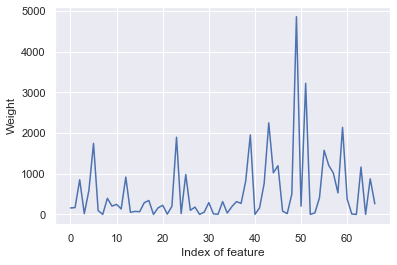

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create an SelectKBest object to select features with two best ANOVA F-Values
selector = SelectKBest(f_classif, k=2)
selector.fit(X_train, y_train)

# Apply the SelectKBest object to the features and target
X_reduced = selector.transform(X_train)
print(selector.scores_)

plt.plot(np.arange(0,len(X.columns)), selector.scores_)
plt.xlabel('Index of feature')
plt.ylabel('Weight')

In [ ]:
# choosing important features
a = selector.scores_
max1 = np.argmax(a)
a[max1] = 0
max2 = np.argmax(a)
print('the most important features: ','\n',X_train.columns[max1],'\n', X_train.columns[max2])

the most important features:  
 main_category_Music 
 main_category_other


------

## Build a model with logistic regression

Use l2 penalty and search for optimal C in np.logspace(-2, 4, 7).

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#grid params
grid = {
        "C":np.logspace(-2,4,7), 
        "penalty":["l2"],
        "max_iter":np.arange(30,50,5)   # it helped me avoid overfiting
        }

# our LogisticRegression model
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5 , n_jobs= -1, verbose=50 )

logreg_cv.fit(X_train, y_train)
#fits about 5 minute

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 136 out of 140 | elapsed:  1.8min remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.8min finished


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'max_iter': array([30, 35, 40, 45]),
                         'penalty': ['l2']},
             verbose=50)

### Q4.2 What is an optimal C for l2 regularization?

In [ ]:
logreg_cv.best_estimator_
'''Optimal C = 10 for l2 regularization '''

'Optimal C = 10 for l2 regularization '

### Q4.3 What is the accuracy for this params?

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_test = logreg_cv.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.6993647048791234


In [ ]:
'''Seems look like the truth'''

'Seems look like the truth'

### Q4.4 What is the two most important features by logistic regression estimation?

category_Performances 
 goal 



Text(0, 0.5, 'Weight')

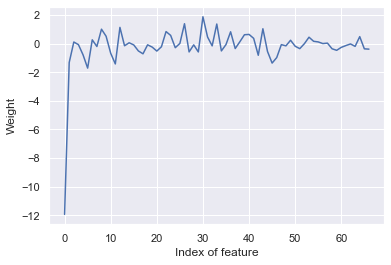

In [ ]:
import numpy as np

#weights of model
coefs = logreg_cv.best_estimator_.coef_[0]
abscoefs = np.abs(coefs)

#searching for max weights
top_two = np.argpartition(abscoefs, -2)[-2:]
print(X_train.columns[top_two[0]],'\n', X_train.columns[top_two[1]], '\n')

plt.plot(np.arange(0,67), coefs)
plt.xlabel('Index of feature')
plt.ylabel('Weight')

In [ ]:
''' And as a result we got C = 10, then lambda = 0.1 for l2 regularization
I think it's optimal lambda, because it seems that model isn't overfited.
But on the plot of feature coefs we can see one data outlier, that 
corresponds with 'goal' column.
I think it's a kind of leakage because this 'goal' was given with different
currencies and it would be better to choose column that has 
this infrormation in one currency'''

" And as a result we got C = 10, then lambda = 0.1 for l2 regularization\nI think it's optimal lambda, because it seems that model isn't overfited.\nBut on the plot of feature coefs we can see one data outlier, that \ncorresponds with 'goal' column.\nI think it's a kind of leakage because this 'goal' was given with different\ncurrencies and it would be better to choose column that has \nthis infrormation in one currency"

### Q4.5 Build roc curve and calculate roc-auc score. What is the roc-auc score?


------

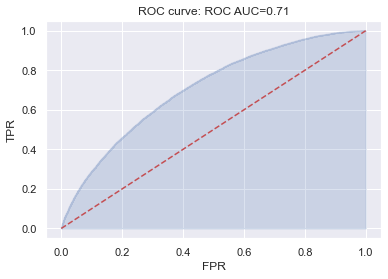

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_prob = logreg_cv.best_estimator_.predict_proba(X_test)
y_probs = y_prob[:,1]


fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.step(fpr,tpr, color ='b', alpha = 0.2, where='post')
plt.fill_between(fpr, tpr, alpha = 0.2, color ='b')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve: ROC AUC={0:0.2f}'.format(roc_auc_score(y_test,y_probs)))
plt.plot([0,1],[0,1], color = 'r', linestyle ='dashed')

In [ ]:
'''
Curve looks too much perfect. Maybe because of huge shape
But the result looks like the truth
AUC is more than 0.5 => our classifier is good.
'''

'\nCurve looks too much perfect. Maybe because of huge shape\nBut the result looks like the truth\nAUC is more than 0.5 => our classifier is good.\n'

------

## Build a random forest model
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# creating model
rfc = RandomForestClassifier(n_estimators=10, max_features = 7, max_depth=6, random_state=42) 

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6820255539290232


In [ ]:
rs = []
for m in rfc.estimators_:
    rs.append(m.random_state)
print(rs)

[1608637542, 1273642419, 1935803228, 787846414, 996406378, 1201263687, 423734972, 415968276, 670094950, 1914837113]


In [ ]:
from tqdm import tqdm
def rf_train_test_accuracy(param_name, param_grid, **params):
    
    train_score, test_score = [], []
    clf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth=6, random_state=42, n_jobs=-1)
    if params:
        clf.set_params(**params)
    
    for param_value in tqdm(param_grid):
        clf.set_params(**{param_name: param_value})
        clf.fit(X_train, y_train)

        train_score.append(accuracy_score(y_train, clf.predict(X_train)))
        test_score.append(accuracy_score(y_test, clf.predict(X_test)))

    return train_score, test_score

### Q4.6 What is an optimal depth and number of trees?

In [ ]:
train_accuracy, test_accuracy = rf_train_test_accuracy('n_estimators', range(1, 50, 2))

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:04<00:00,  2.57s/it]


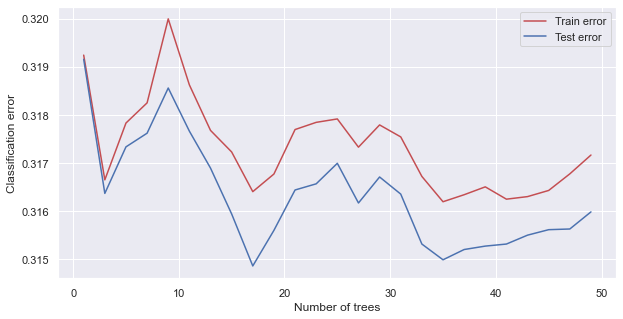

In [ ]:
train_error_1 = 1-np.array(train_accuracy)
test_error_1 = 1-np.array(test_accuracy)

plt.figure(figsize=(10,5))
plt.plot(list(range(1,50,2)), train_error_1, c='r', label='Train error')
plt.plot(list(range(1,50,2)), test_error_1, c='b', label='Test error')
plt.xlabel('Number of trees')
plt.ylabel('Classification error')
plt.legend();

In [ ]:
''' Choosing not very big number of trees and with min test error'''

' Choosing not very big number of trees and with min test error'

In [ ]:
train_accuracy, test_accuracy = rf_train_test_accuracy('max_depth', range(1, 30))

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:08<00:00,  2.36s/it]


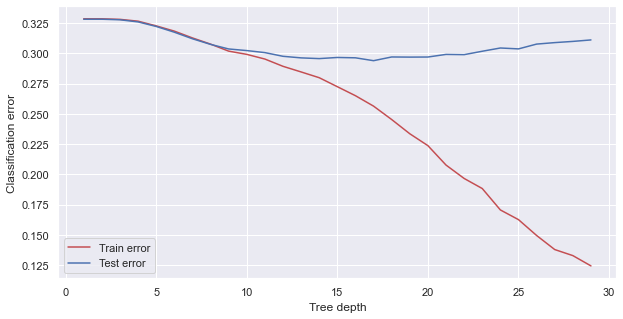

In [ ]:
test_error = 1-np.array(test_accuracy)

plt.figure(figsize=(10,5))
plt.plot(list(range(1,30)), 1-np.array(train_accuracy), c='r', label='Train error')
plt.plot(list(range(1,30)), test_error, c='b', label='Test error')
plt.xlabel('Tree depth')
plt.ylabel('Classification error')
plt.legend();

In [ ]:
opt_depth = test_error.argmin()

In [ ]:
''' Chosing depth where test error is min '''

' Chosing depth where test error is min '

### Q4.7 What is the accuracy for this params?

In [ ]:
rfc = RandomForestClassifier(n_estimators=8, max_features=7, max_depth=10, random_state=42) 

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(round(accuracy_score(y_test, y_pred),3))

0.695


### Q4.8 Build precision-recall curve. What is the precision for recall 0.5?

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a simple classifier
clf = RandomForestClassifier(n_estimators=8, max_features=8, max_depth=10, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, n_estimators=8, n_jobs=-1,
                       random_state=42)

(0.0, 1.0)

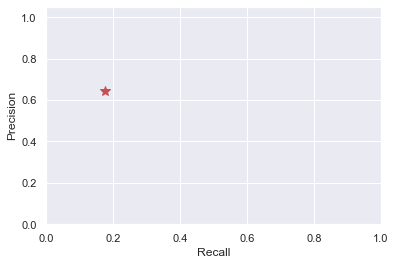

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_pred = clf.predict(X_test)
plt.plot(recall_score(y_test, y_pred), 
         precision_score(y_test, y_pred), 
         '*r', ms=10
         )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred[:5])

y_prob = clf.predict_proba(X_test)
print(y_prob[:5])

[1 0 0 0 0]
[[0.45006095 0.54993905]
 [0.68112412 0.31887588]
 [0.8223542  0.1776458 ]
 [0.77513898 0.22486102]
 [0.8085078  0.1914922 ]]


In [ ]:
y_prob = y_prob[:, 1]

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.38')

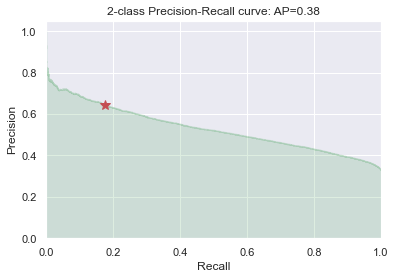

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.step(recall, precision, color='g', alpha=0.2, where='post')

plt.plot(recall_score(y_test, y_pred), 
         precision_score(y_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_score(y_test, y_pred)))

### Q4.9 What is the two most important features by random forest?

------

In [ ]:
a = clf.feature_importances_
max1 = np.argmax(a) 
print(X_train.columns[max1])
a[max1]=0
max2 = np.argmax(a)
print(X_train.columns[max2])

goal
duration_days


------

# Build the stronger model

In [ ]:
df_file2

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal,year,duration_days,region,name_length
ID,,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,0.000000,2015,58,europe,31
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,0.080700,2017,59,america,45
1000004038,Where is Hank?,other,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,0.004889,2013,44,america,14
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,0.000200,2012,29,america,49
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,0.065795,2015,55,america,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,25.0,25.0,50000.00,0.000500,2014,29,america,49
999977640,The Tribe,other,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,155.0,155.0,1500.00,0.103333,2011,26,america,9
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,other,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,20.0,20.0,15000.00,0.001333,2010,45,america,71


### Q5.1 Generate two (or more) meaningfull features

In [ ]:
df_file2['seasonOfStart'] = (pd.to_datetime(df_file2['launched']).dt.month%12+3)//3
df_file2['LongName'] = (df_file2['name_length'] > 50).astype(int)

In [ ]:
df_file2.drop(['pledge2goal','usd_pledged_real', 'usd pledged', 'country', 'pledged', 'launched' , 'deadline', 'currency', 'name','year', 'goal','backers' ], axis='columns', inplace=True)

In [ ]:
df_file2

,category,main_category,state,usd_goal_real,duration_days,region,name_length,seasonOfStart,LongName
ID,,,,,,,,,
1000002330,other,Publishing,0,1533.95,58,europe,31,3,0
1000003930,other,Film & Video,0,30000.00,59,america,45,4,0
1000004038,other,Film & Video,0,45000.00,44,america,14,1,0
1000007540,Music,Music,0,5000.00,29,america,49,2,0
1000011046,Film & Video,Film & Video,0,19500.00,55,america,58,3,1
...,...,...,...,...,...,...,...,...,...
999976400,Documentary,Film & Video,0,50000.00,29,america,49,4,0
999977640,other,Film & Video,0,1500.00,26,america,9,3,0
999986353,other,Film & Video,0,15000.00,45,america,71,3,1


In [ ]:
# encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse= False)

numerical_features = ['duration_days', 'usd_goal_real']
categorical_fetures = ['category', 'main_category','region','seasonOfStart' ]

X = df_file2[[*numerical_features, *categorical_fetures]]
Y = df_file2['state']

encoded_features = pd.DataFrame(ohe.fit_transform(X[['category', 'main_category','region','seasonOfStart' ]]))
category_cols = [f'category_{col}' for col in ohe.categories_[0]]
main_category_cols = [f'main_category_{col}' for col in ohe.categories_[1]]
region_cols = [f'region_{col}' for col in ohe.categories_[2]]
season_cols = [f'season_{col}' for col in ohe.categories_[3]]

dummy_col_names = [*category_cols,*main_category_cols,*region_cols, *season_cols]
encoded_features.columns = dummy_col_names
encoded_features.index = X.index

X.drop(['category', 'main_category','region','seasonOfStart'], axis= 1 , inplace=True)
X = pd.concat([X, encoded_features], axis=1)
X = pd.concat([X , df_file2['seasonOfStart']], axis = 1)

len(X.columns)

C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


60

In [ ]:
#checking for null
X.isnull().sum().sum()

0

In [ ]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
#scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-73-6b50ad6a7ce0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_features] = scaler.transform(X_train[numerical_features])
C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-73-6b50ad6a7ce0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

### Q5.2 Train an xgboost, that's beat random forest

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#creating model
clf = XGBClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7083611659868393


In [ ]:
#checking for important features
a = clf.feature_importances_
max1 = np.argmax(a)
print(X_train.columns[max1])
a[max1]=0
max2 = np.argmax(a) 
print(X_train.columns[max2])

category_Theater
main_category_Music


In [ ]:
'''
Yes, it beats all previous models. Not so much. 
I think it's imposible to have accuracy bigger than about 0.7
in this particular task with this dataset,
because many useful parameters weren't recorded to dataset.
e.g quality of advertising campagn are one of the most
important parts of crowdfunding. 
 '''

"\nYes, it beats all previous models. Not so much. \nI think it's imposible to have accuracy bigger than about 0.7\nin this particular task with this dataset,\nbecause many useful parameters weren't recorded to dataset.\ne.g quality of advertising campagn are one of the most\nimportant parts of crowdfunding. \n "

Thanks for interesting homeworks!
